In [26]:
import numpy as np
import os
import sys
import time
import math
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from skimage import exposure
from sklearn.model_selection import train_test_split

%matplotlib inline

/anaconda/envs/py35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


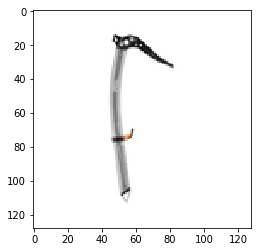

In [3]:
def pad_image(x): #image
    x.shape
    idealSize = 2**( math.floor(np.log2(max(x.shape[0], x.shape[1])))+1 )

    pad = x.shape[0] - x.shape[1]

    padX = idealSize - x.shape[0]
    padY = idealSize - x.shape[1]

    padx_before = padX//2
    padx_after=  idealSize - padx_before - x.shape[0]

    pady_before = padY//2
    pady_after = idealSize - pady_before - x.shape[1]

    newArr = np.pad(x, ((padx_before,padx_after),(pady_before,pady_after),(0,0)),mode='constant', constant_values=255)

    img = Image.fromarray(newArr, 'RGB')
    img2 = img.resize((128,128), Image.ANTIALIAS)
    plt.imshow(img2)
    return img2

def contrast_stretching(img): #img as image
    # Adaptive Equalization
    img_adapteq = exposure.equalize_adapthist(np.asarray(img), clip_limit=0.03)
    return img_adapteq

def preprocess_img(img):
    img1 = pad_image(img)
    img2 = contrast_stretching(img1)
    return img2


features = []
labels = []

for path, subdirs, files in os.walk('gear_images/'):
    for name in files:
        label = path.split('/')[1]
        full_path = os.path.join(path, name)
        img = plt.imread(full_path)
        preprocessed_image = preprocess_img(img).flatten()
        
        features.append(preprocessed_image)
        labels.append(label)

In [85]:
X = np.asarray(features)

# unique_labels = list(set(labels))
# y = [unique_labels.index(a) for a in labels]
# y = np.asarray(y)
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y=labels)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=46)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9042386185243328

In [48]:
!wget https://shop.epictv.com/sites/default/files/ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg

--2018-07-16 22:42:04--  https://shop.epictv.com/sites/default/files/ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg
Resolving shop.epictv.com (shop.epictv.com)... 46.137.89.104, 46.137.182.250
Connecting to shop.epictv.com (shop.epictv.com)|46.137.89.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171537 (168K) [image/jpeg]
Saving to: ‘ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg’

ae42ad29e70ba8ce6b6 100%[===================>] 167.52K   656KB/s    in 0.3s    

2018-07-16 22:42:05 (656 KB/s) - ‘ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg’ saved [171537/171537]



/anaconda/envs/py35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


array([7])

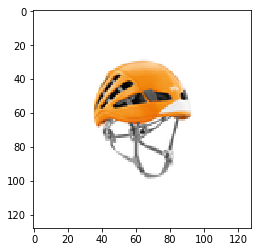

In [98]:
raw_image = plt.imread('ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg')
processed_image = preprocess_img(raw_image).flatten()
prediction = model.predict(processed_image.reshape(1, -1))

# unique_labels[11]
prediction

In [99]:
encoder = LabelEncoder().fit(y=labels)
encoder.inverse_transform(7)

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'helmets'

In [102]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 27,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  32,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,  82,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   1,  28,   0,   0,   0,   0,   0,   0,   1,   2],
       [  0,   0,   0,   0,  71,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0, 143,   0,   0,   1,   0,   0,   0],
       [  1,   0,   0,   0,   0,   2,  39,   0,   0,   0,   0,   2],
       [  0,   0,   2,   0,   0,   2,   0,  30,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  25,   0,   0,  39,   0,   0,   0],
       [  0,   0,   0,   0,   0,   7,   0,   0,   0,   4,   1,   0],
       [  0,   0,   0,   0,   0,   4,   0,   0,   0,   0,  54,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  27]])

In [ ]:
labels_unique = [encoder.inverse_transform(i) for i in range(11)]
labels_unique

In [5]:
a=1/3
a_str='{0:.4}'.format(a)
print(a_str[2:])

3333
